In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import numpy as np

In [2]:
# Chargement
iris = pd.read_csv("iris_dataset.csv")

In [3]:
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.138728,3.470118,1.441015,1.094873,setosa
1,2,4.849873,3.034931,1.414931,0.968687,setosa
2,3,4.715843,3.239083,1.295309,1.006643,setosa
3,4,4.603747,NaN,1.480616,1.002344,setosa
4,5,4.988744,3.645049,1.417527,1.122947,setosa


In [4]:
# On renomme les colonnes
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]

# On supprime l'identifiant des iris
del iris["id"]

# On supprime les individus contenant au moins une valeur manquante
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))

iris : 150 individus, iris_dna : 146 individus


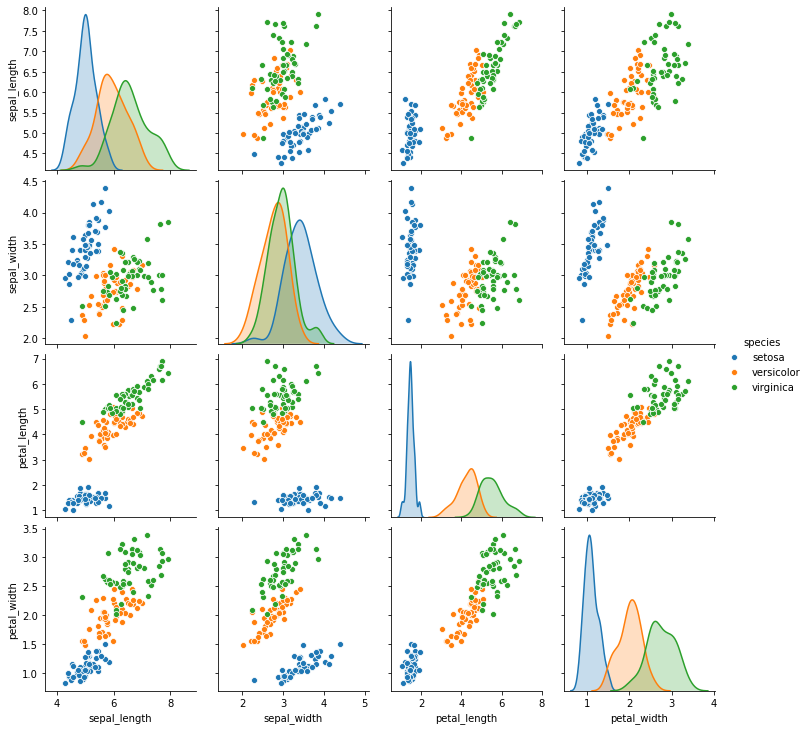

In [5]:
# Affichage des diagrammes de dispersion
sns.pairplot(iris_dna,hue="species")
plt.show()

In [6]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

In [7]:
iris_setosa.shape

(49, 5)

### Question 1 :

Sur le dataframe iris_dna, calculez les coefficients de corrélation linéaires suivants :
- petal_width en fonction de petal_length
- sepal_width en fonction de petal_width

Coeff de corrélation --> [-1, 1]. Si r proche de cero, pas de corrélation. Proche de 1, corr (+). proche de -1, corr (-)

In [8]:
# scipy.stats.pearsonr(x, y)

print(st.pearsonr(iris_dna["petal_length"],iris_dna["petal_width"])[0])
print(st.pearsonr(iris_dna["petal_width"],iris_dna["sepal_width"])[0])

0.9418817573025178
-0.2479713061578459


### Question 2:
Commentez les résultats de la question 1 grâce aux 2 diagrammes de dispersion donnés dans l'énoncé.

Ensuite, gardez en tête le coefficient de corrélation linéaire de sepal_width en fonction de petal_width. Celui-ci est calculé sur l'ensemble des iris. Quand on calcule les coefficients de corrélation linéaire de ces mêmes variables, mais en les séparant par espèce, on obtient les résultats suivants :

    sepal_width en fonction de petal_width sur iris_setosa : 0,753

    sepal_width en fonction de petal_width sur iris_virginica : 0,685

    sepal_width en fonction de petal_width sur iris_versicolor : 0,825

NB : Vous n'avez pas besoin de refaire ce calcul.

Comparez (dans votre tête) ces 3 résultats à celui obtenu sur l'ensemble des iris (question 1).

NB: Vous n'avez pas à répondre à cette question dans votre rendu.

Ces résultats sont mieux interprétables quand on colore les points selon l'espèce d'iris :



### Réponse: 
petal_length et petal_width sont corrélées lineairement. Par contre, sepal_with en fonction de petal_width no sont corrélées sur l'ensemble des iris. Sur chaque espèce les résultats changent.


In [9]:
print(st.pearsonr(iris_setosa["petal_width"],iris_setosa["sepal_width"])[0])

0.7531349595699939


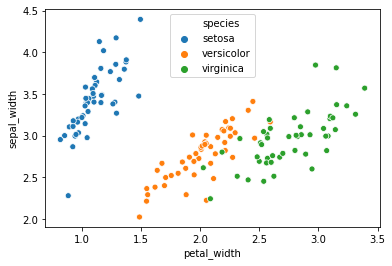

In [10]:
sns.scatterplot(iris_dna["petal_width"],iris_dna["sepal_width"], hue=iris_dna["species"])
plt.show()

### Question 3 :

Réalisez 4 régressions linéaires (avec la méthode des moindres carrés). Nous utiliserons la notation suivante : Y = aX + b + epsilon .

a et b sont les réels que vous devez estimer, epsilon le terme d'erreur (vous n'avez pas à vous en soucier), X et Y sont 2 variables.

Les 4 régressions linéaires correspondent à chacun de ces 4 cas :
Remarque : ce sont les 4 cas que nous étudions depuis le début.

Donnez pour chacun des ces 4 cas les estimations de a et de b.

### cas 1:
X est la variable petal_length et Y la variable petal_width, sur le dataframe iris_dna 

In [11]:
import statsmodels.api as sm

In [12]:
Y = iris_dna['petal_width']
X = iris_dna[['petal_length']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.

result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_length'],result.params['intercept']

In [13]:
print('a: {}, b: {}'.format(a,b))

a: 0.38599421003086465, b: 0.50926833653


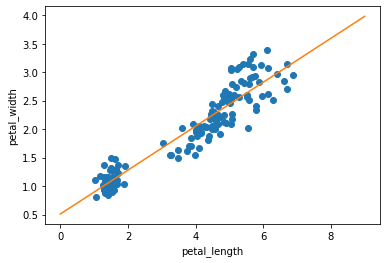

In [14]:
plt.plot(iris_dna.petal_length,iris_dna.petal_width, "o")
plt.plot(np.arange(10),[a*x+b for x in np.arange(10)])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

### cas 2 :
X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_setosa 

In [15]:
Y = iris_setosa['sepal_width']
X = iris_setosa[['petal_width']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.

result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_width'],result.params['intercept']

print('a: {}, b: {}'.format(a,b))

a: 1.7875014940283427, b: 1.4593274917352757


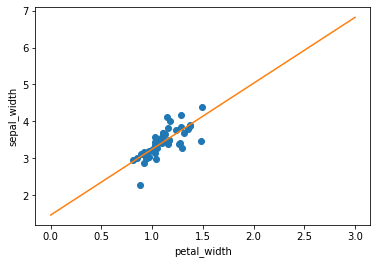

In [16]:
plt.plot(iris_setosa.petal_width,iris_setosa.sepal_width, "o")
plt.plot(np.arange(4),[a*x+b for x in np.arange(4)])
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

### cas  3:
X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_virginica

In [17]:
Y = iris_virginica['sepal_width']
X = iris_virginica[['petal_width']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.

result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_width'],result.params['intercept']

print('a: {}, b: {}'.format(a,b))

a: 0.6992505959712974, b: 1.0377429413261894


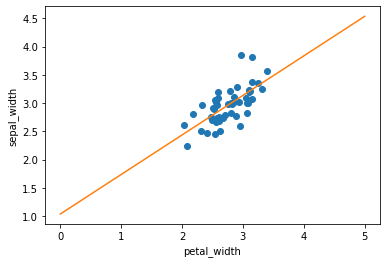

In [18]:
plt.plot(iris_virginica.petal_width,iris_virginica.sepal_width, "o")
plt.plot(np.arange(6),[a*x+b for x in np.arange(6)])
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

### cas 4:
X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_versicolor

In [19]:
Y = iris_versicolor['sepal_width']
X = iris_versicolor[['petal_width']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.

result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_width'],result.params['intercept']

print('a: {}, b: {}'.format(a,b))

a: 0.9735704312621843, b: 0.8094893720788443


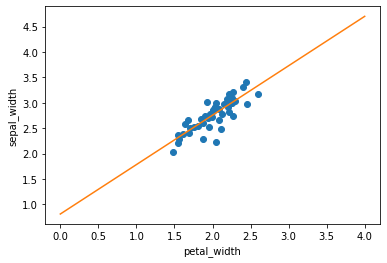

In [20]:
plt.plot(iris_versicolor.petal_width, iris_versicolor.sepal_width, "o")
plt.plot(np.arange(5),[a*x+b for x in np.arange(5)])
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

### Question 4 :

Voici les 4 lignes contenant des données manquantes :

Pour chaque individu, la valeur manquante se trouve soit dans la variable petal_width soit dans la variable sepal_width. Dans ces 2 cas, on peut imputer (remplir) ces valeurs grâce aux régressions linéaires que nous avons étudiées précédemment. Ces valeurs seront approchées mais fausses.
En supposant qu'un individu n'a jamais plus d'une valeur manquante, voici le code qui remplace les valeurs manquantes grâce aux régressions linéaires. Des bouts de code ont été supprimés et remplacés par "[...]" : à vous de les retrouver.

In [21]:
coeffs = {

    "cas 1" : {'a': 0.38599421003086465 , 'b': 0.50926833653 },
    "cas 2" : {'a': 1.7875014940283427 , 'b': 1.4593274917352757 },
    "cas 3" : {'a': 0.6992505959712974 , 'b': 1.0377429413261894 },
    "cas 4" : {'a': 0.9735704312621843 , 'b': 0.8094893720788443 },
}

lignes_modifiees = []

for (i,individu) in iris.iterrows(): # pour chaque individu de iris,...
    if pd.isnull(individu["petal_width"]): #... on test si individu["petal_width"] est nul.
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individu["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété petal_width par {} a partir de petal_length={}".format(Y,X))
        
    if pd.isnull(individu["sepal_width"]):
        
        espece = individu["species"]
        X = individu["petal_width"]
               
        if espece == "setosa":
            a = coeffs["cas 2"]['a']
            b = coeffs["cas 2"]['b']
            Y = a*X + b
            iris.loc[i,"sepal_width"] = Y
            lignes_modifiees.append(i)
            print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))
                    
        elif espece == "virginica":
            a = coeffs["cas 3"]['a']
            b = coeffs["cas 3"]['b']
            Y = a*X + b
            iris.loc[i,"sepal_width"] = Y
            lignes_modifiees.append(i)
            print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))
        
            
        elif espece == 'versicolor':
            a = coeffs["cas 4"]['a']
            b = coeffs["cas 4"]['b']
            
            Y = a*X + b
            iris.loc[i,"sepal_width"] = Y
            lignes_modifiees.append(i)
            print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))
        
print(iris.loc[lignes_modifiees])


On a complété sepal_width par 3.2510181164082863 a partir de l'espece:setosa et de petal_width=1.0023435676326218
On a complété petal_width par 2.0639904746744127 a partir de petal_length=4.027837977207209
On a complété sepal_width par 3.0097140752819262 a partir de l'espece:versicolor et de petal_width=2.259954321281721
On a complété sepal_width par 3.360564196480711 a partir de l'espece:virginica et de petal_width=3.3218723995908728
     sepal_length  sepal_width  petal_length  petal_width     species
3        4.603747     3.251018      1.480616     1.002344      setosa
53       5.442775     2.340928      4.027838     2.063990  versicolor
61       5.879497     3.009714      4.181942     2.259954  versicolor
100      6.230628     3.360564      6.001908     3.321872   virginica
